# Distribution of GAIA non single star indicators in different populations

Comparing the distributions of `sepsi`, `RUWE`, and `e_RV` of
- Multi-star systems (doubly eclipsing systems as a proxy)
- binary systems (eclipsing binaries as a proxy)
- general population

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")

In [30]:
_r = df_eb["e_RV"].copy()
_r = np.sort(_r)
_r = _r[~np.isnan(_r)]
_r

array([ 0.12,  0.12,  0.13, ..., 39.41, 39.55, 39.59])

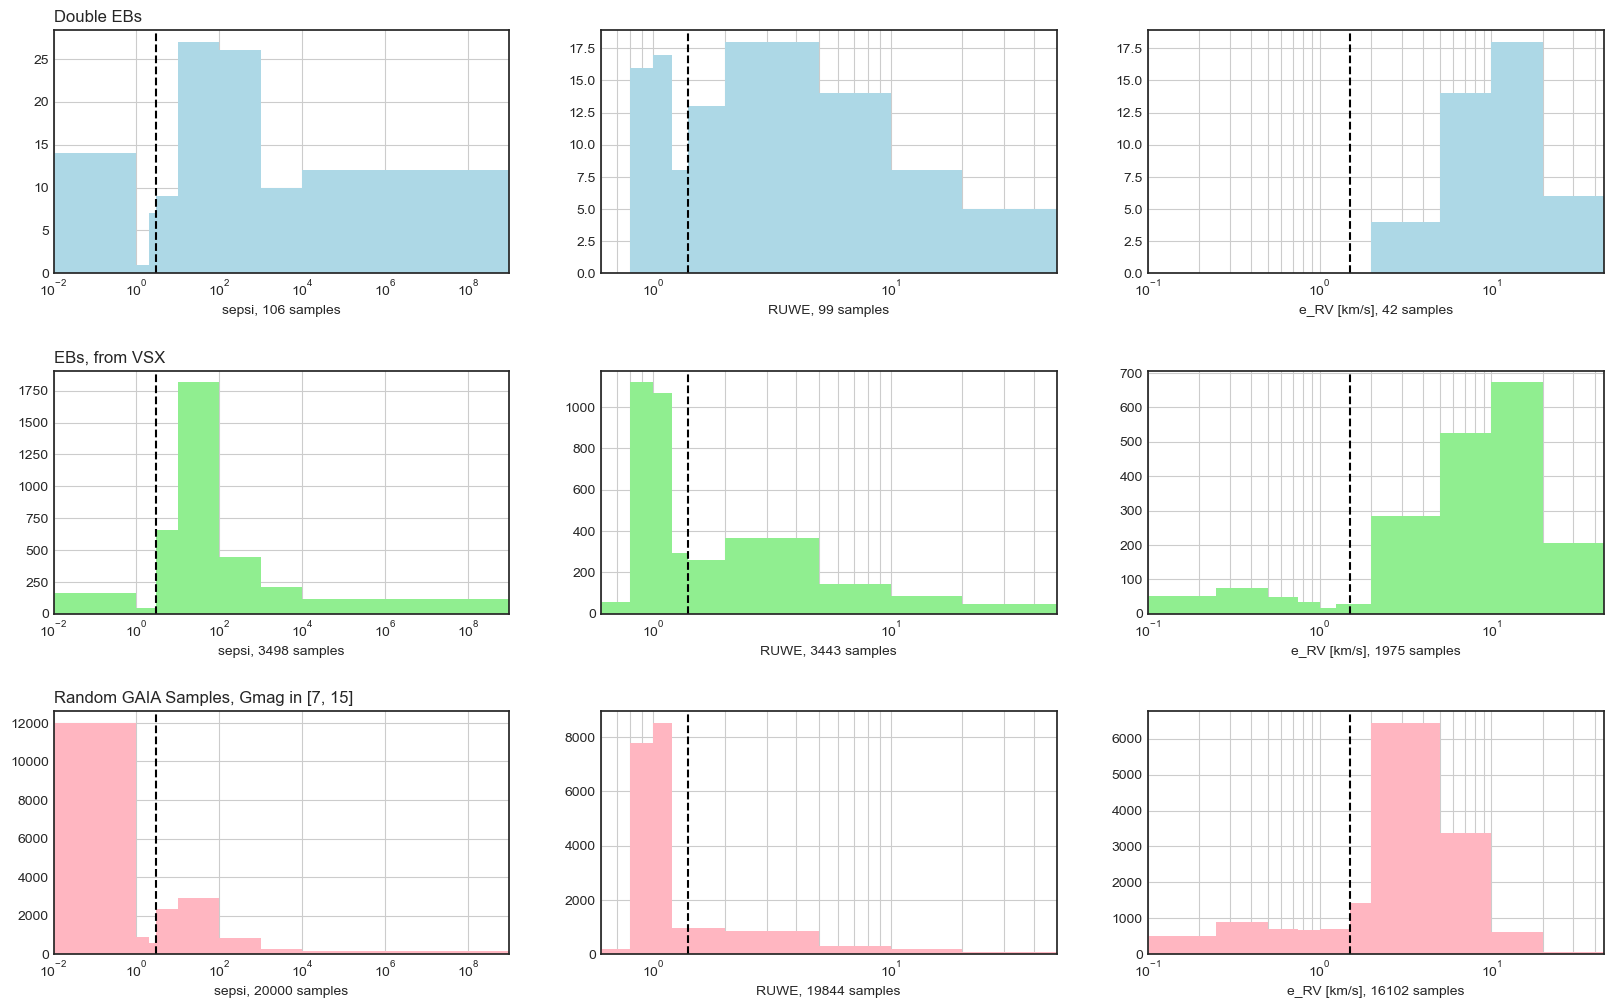

In [49]:
def do_plots(df, title, color="lightblue", axs=None):
    axs[0].set_title(title, loc="left")
    bins = int(len(df) / 5)

    df_f = df[pd.notna(df["sepsi"])]
    ax = df_f["sepsi"].hist(bins=[0, 1, 2, 3, 10, 100, 1000, 10000, 1e9], ax=axs[0], color=color);
    ax.set_xscale("log")
    ax.set_xlabel(f"sepsi, {len(df_f)} samples")
    ax.grid(visible=True, which="both", axis="x")  # show minor grid lines too
    ax.set_xlim(0.01, 1e9)
    ax.axvline(3, c="black", linestyle="--")

    df_f = df[pd.notna(df["RUWE"])]
    ax = df_f["RUWE"].hist(bins=[0, 0.5, 0.8, 1.0, 1.2, 1.4, 2.0, 5.0, 10.0, 20.0, 50, 1e9], ax=axs[1], color=color);
    ax.set_xscale("log")
    ax.set_xlabel(f"RUWE, {len(df_f)} samples")
    ax.grid(visible=True, which="both", axis="x")  # show minor grid lines too
    ax.set_xlim(0.6, 50)
    ax.axvline(1.4, c="black", linestyle="--")

    df_f = df[pd.notna(df["e_RV"])]
    ax = df_f["e_RV"].hist(bins=[0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 5.0, 10.0, 20.0, 50, 1e9], ax=axs[2], color=color);
    ax.set_xscale("log")
    ax.set_xlabel(f"e_RV [km/s], {len(df_f)} samples")
    ax.grid(visible=True, which="both", axis="x")  # show minor grid lines too
    ax.set_xlim(0.1, 45)
    ax.axvline(1.5, c="black", linestyle="--")

    return axs


num_datasets = 3
fig, axs = plt.subplots(1 * num_datasets, 3, figsize=(20, 4 * num_datasets))  # sharex='col'

df_quad = pd.read_csv("catalog_samples/tess_double_eb_samples_with_gaia_dr3.csv")
do_plots(df_quad, "Double EBs", axs=axs[0], color="lightblue");

df_eb = pd.read_csv("catalog_samples/pht_vsx_eb_samples_with_gaia_dr3.csv")
df_eb.rename(columns={"GAIA_RUWE": "RUWE", "GAIA_epsi": "epsi", "GAIA_sepsi": "sepsi", "GAIA_e_RV": "e_RV"}, inplace=True)
do_plots(df_eb, "VSX EBs seen on PHT", axs=axs[1], color="lightgreen");

df_gaia = pd.read_csv("catalog_samples/gaia_dr3_20k_samples.ecsv", comment="#")  # nrows=1000
df_gaia.rename(columns={"astrometric_excess_noise": "epsi", "astrometric_excess_noise_sig": "sepsi", "ruwe": "RUWE","radial_velocity_error": "e_RV"}, inplace=True)
do_plots(df_gaia, "Random GAIA Samples, Gmag in [7, 15] ", axs=axs[2], color="lightpink");

plt.subplots_adjust(hspace=0.4)  # extra space between rows for the titles

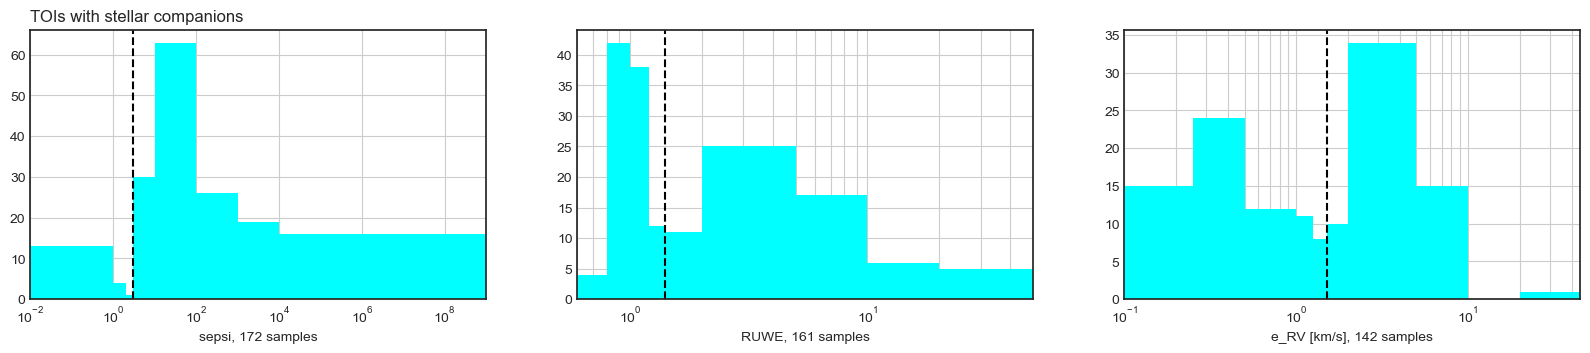

In [38]:
df_toi_w_comp = pd.read_csv("catalog_samples/toi_w_stellar_companion_samples_with_gaia_dr3.csv")

fig, axs = plt.subplots(1, 3, figsize=(20, 3.5))
do_plots(df_toi_w_comp, "TOIs with stellar companions", axs=axs, color="cyan");

In [51]:
# proportion of different data set  that meet some of the NSS proxy indicators

def print_large_nss_indicator_summary(df, heading):
    print("")
    print(heading)
    
    _large, _all = len(df[df["RUWE"] > 1.4]), len(df[df["RUWE"] > 0])
    print(f"RUWE > 1.4:          {100*_large/_all:.0f}%  ( {_large} / {_all} )") 
    
    _large, _all = len(df[df["epsi"] > 10]), len(df[df["epsi"] > 0])
    print(f"epsi (AEN) > 10 mas: {100*_large/_all:2.0f}%  ( {_large} / {_all} )") 
    
    _large, _all = len(df[df["sepsi"] > 3]), len(df[df["sepsi"] > 0])
    print(f"sepsi (AENS) > 3:    {100*_large/_all:.0f}%  ( {_large} / {_all} )") 
    
    _large, _all = len(df[df["e_RV"] > 1.5]), len(df[df["e_RV"] > 0])
    print(f"e_RV > 1.5 km/s:     {100*_large/_all:.0f}%  ( {_large} / {_all} )") 


print_large_nss_indicator_summary(df_gaia, "Random Gaia Samples, Gmag in [7, 15]:")
print_large_nss_indicator_summary(df_eb, "VSX EBs seen on PHT:")
print_large_nss_indicator_summary(df_quad, "2+2 candidates:")
print_large_nss_indicator_summary(df_toi_w_comp, "TOIs with stellar companions:")


Random Gaia Samples, Gmag in [7, 15]:
RUWE > 1.4:          12%  ( 2380 / 19844 )
epsi (AEN) > 10 mas:  1%  ( 73 / 9803 )
sepsi (AENS) > 3:    61%  ( 6545 / 10755 )
e_RV > 1.5 km/s:     74%  ( 11943 / 16102 )

VSX EBs seen on PHT:
RUWE > 1.4:          26%  ( 903 / 3443 )
epsi (AEN) > 10 mas:  1%  ( 41 / 3373 )
sepsi (AENS) > 3:    96%  ( 3252 / 3380 )
e_RV > 1.5 km/s:     87%  ( 1718 / 1975 )

2+2 candidates:
RUWE > 1.4:          59%  ( 58 / 99 )
epsi (AEN) > 10 mas:  6%  ( 6 / 94 )
sepsi (AENS) > 3:    89%  ( 84 / 94 )
e_RV > 1.5 km/s:     100%  ( 42 / 42 )

TOIs with stellar companions:
RUWE > 1.4:          40%  ( 65 / 161 )
epsi (AEN) > 10 mas:  6%  ( 9 / 162 )
sepsi (AENS) > 3:    94%  ( 154 / 163 )
e_RV > 1.5 km/s:     42%  ( 60 / 142 )


In [36]:
# [c for c in df_eb.columns if "GAIA" in c.upper()]
# df_eb[["tic_id", "VSX_Is_EB", "VSX_Name", "VSX_Period"]]

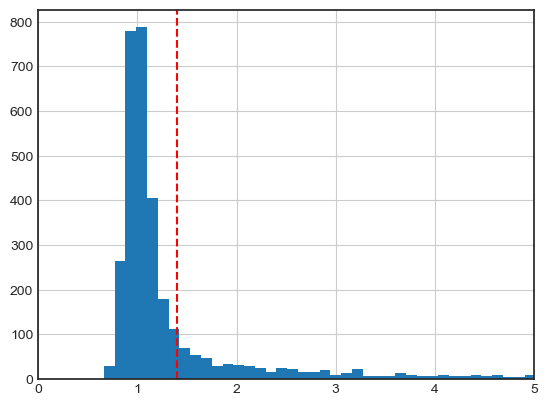

In [5]:
ax = df_eb["RUWE"].hist(bins=500);
ax.set_xlim(0, 5);
ax.axvline(1.4, color="red", linestyle="--");

In [7]:
# Scratch: get Gaia DR3 parameters for TOIs with stellar companions

_df = pd.read_csv("catalog_samples/exofop_stellarcomp.psv", delimiter="|")  # from ExoFOP
# get a list of TIC IDs to be fed to Vizier
# Vizier can't accept too many of them. 200 seems to work.
",".join(_df[pd.notna(_df["TOI"])]["TIC ID"].unique().astype(str)[:200])

# then get GAIA DR2 IDs from
#   https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=IV/39/tic82
# use Gaia DR2 IDs to query Gaia DR3 data
#  https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=I/355/gaiadr3

'909930,1003831,1018843,1129033,1260235,2758565,3680800,4464022,4729001,4999813,5592720,5772442,5868998,6853696,8516795,8853478,9102327,9727392,9830791,9858404,13419950,13499636,14570132,14709225,15460993,15863518,16288184,17005768,17652022,17746821,17865622,18373995,18795429,19025965,19451711,19519368,19612445,20299658,20892672,21130820,21832928,21997420,22069559,22221375,23170835,23179035,23937608,24113219,24695044,25139786,25375553,25799609,26547036,26693519,27064468,27194429,27294830,27534138,27769688,27863043,27966179,27990610,28294709,29119552,29191596,29857954,29919341,30828562,31637479,31852980,33091633,33350443,35009898,35106764,35582553,36381058,36452991,37117064,37575651,38087018,38118291,38161230,38467100,38509907,38939275,39724477,39858507,40055053,40083958,40466976,40779013,41227743,41387532,41995709,42484503,42755801,42763678,44510874,44791617,44792534,45655786,45996325,46307587,46807139,47425697,47617038,47617161,48210046,48476907,48476908,48506505,48661942,49079670,496

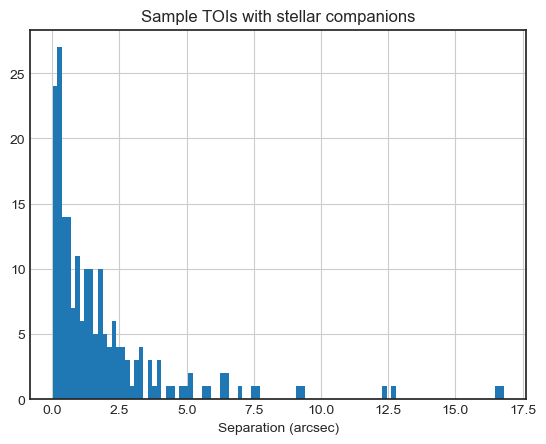

In [8]:
tics_stellarcomp = _df[pd.notna(_df["TOI"])]["TIC ID"].unique()[:200]

_df2 = _df[["TIC ID", "Separation (arcsec)"]]
_df2 = _df2[_df2["TIC ID"].isin(tics_stellarcomp)]
# a TIC could have multiple entries in the csv for a companion.
# Here we assume a TIC have at most 1 actual companion only.
_df2 = _df2.groupby(by="TIC ID", ).mean()

ax = _df2["Separation (arcsec)"].hist(bins=100);
ax.set_xlabel("Separation (arcsec)");
ax.set_title("Sample TOIs with stellar companions");